In [4]:
import tensorflow as tf
import numpy as np

definimos celsius y fahrenheit

In [5]:
celsius = np.array([-40, -10,0,8,15,22,38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59,72, 100], dtype=float)

Definimos las capas con KERAS en este caso solo una entrada y una salida

In [6]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

Optimizamos el modelo con el optimizador Adam (explayar)

In [7]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

Entrenamos el modelo

In [9]:
print('Comenzamos a entrenar')
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado, ya esta listo para hacer predicciones")

Comenzamos a entrenar
Modelo entrenado, ya esta listo para hacer predicciones


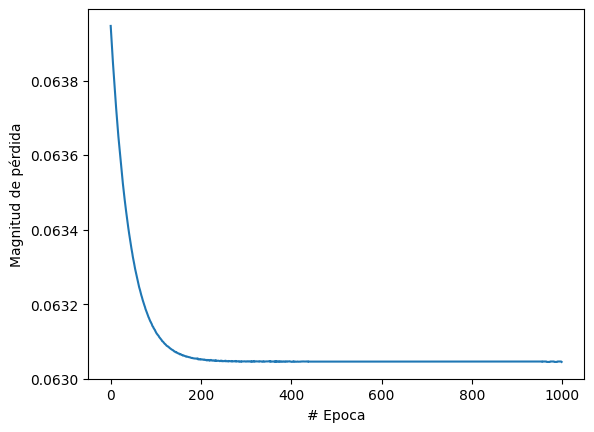

In [10]:
##Acá aplicaremos una funcion de perdida para saber que tan mal estan los resultados de la red en cada vuelta que dio
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


De resultado, lo que podemos ver es que tardó casi 200 vueltas en dejar de producir errores

Pongamos a predecir!! en este caso, podrá predecir cuanto son 100 grados celsius?

In [12]:
print("Hagamos la predicción")
resultado = modelo.predict([100.0])
print("Resultado es" + str(resultado) + " fahrenheit!")

Hagamos la predicción
1/1 [==============================] - 0s 42ms/step
Resultado es[[211.74742]] fahrenheit!


WOW! podemos ver que nos dio como resultado un numero casi exacto! pero ahora.... que variables habra usado dentro del proceso como peso y sesgo? vamos a ver...

In [13]:
print("Variables interanas del modelo")
print(capa.get_weights())

Variables interanas del modelo
[array([[1.7979494]], dtype=float32), array([31.95248], dtype=float32)]


Como vemos en el resultado, podemos ver que nos da un peso de 1.797 y un sesgo de 31.952 que es increible

# Acá hago la prueba pero con mas capas

In [15]:
oculta1 = tf.keras.layers.Dense (units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense (units=3)
salida = tf.keras.layers.Dense (units=3)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


In [16]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [17]:
print('Comenzamos a entrenar')
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado, ya esta listo para hacer predicciones")

Comenzamos a entrenar
Modelo entrenado, ya esta listo para hacer predicciones


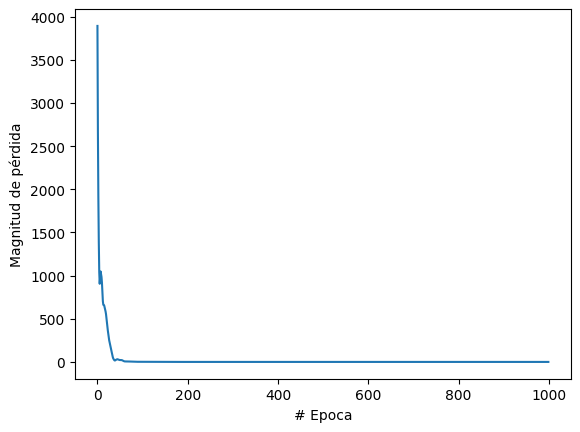

In [18]:
##Acá aplicaremos una funcion de perdida para saber que tan mal estan los resultados de la red en cada vuelta que dio
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


In [21]:
print("Variables interanas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables interanas del modelo
[array([[0.37151933, 0.4856561 , 0.08409096]], dtype=float32), array([ 4.021334 ,  3.6460598, -2.8827646], dtype=float32)]
[array([[ 0.5720433 , -1.0094545 ,  1.6222934 ],
       [-0.36902377,  0.23877251,  1.8642608 ],
       [ 0.6815187 , -0.01922614, -1.0312867 ]], dtype=float32), array([3.2811868, 2.106796 , 3.971479 ], dtype=float32)]
[array([[1.7993026 , 1.1172926 , 0.8522409 ],
       [0.5715672 , 0.9695855 , 0.26230708],
       [1.2550503 , 1.371528  , 1.2587079 ]], dtype=float32), array([3.018164 , 2.6154146, 4.7777495], dtype=float32)]
